<a href="https://colab.research.google.com/github/anupbagale/Image_Processing/blob/main/Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def canny_edge_detection(image_path, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    img = cv.imread(image_path)

    # Convert the image to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the image to reduce noise
    blurred = cv.GaussianBlur(gray, (5, 5), 1.4)

    # Compute the gradient intensity and direction using Sobel operators
    gradient_x = cv.Sobel(blurred, cv.CV_64F, 1, 0, ksize=3)
    gradient_y = cv.Sobel(blurred, cv.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    angle = np.arctan2(gradient_y, gradient_x)
    angle = np.degrees(angle)
    angle[angle < 0] += 180

    # Non-maximum suppression
    non_max_suppressed = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            region = 255
            adjacent_1 = 255
            adjacent_2 = 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                region = magnitude[i, j]
                adjacent_1 = magnitude[i, j + 1]
                adjacent_2 = magnitude[i, j - 1]
            elif 22.5 <= angle[i, j] < 67.5:
                region = magnitude[i, j]
                adjacent_1 = magnitude[i + 1, j - 1]
                adjacent_2 = magnitude[i - 1, j + 1]
            elif 67.5 <= angle[i, j] < 112.5:
                region = magnitude[i, j]
                adjacent_1 = magnitude[i + 1, j]
                adjacent_2 = magnitude[i - 1, j]
            elif 112.5 <= angle[i, j] < 157.5:
                region = magnitude[i, j]
                adjacent_1 = magnitude[i - 1, j - 1]
                adjacent_2 = magnitude[i + 1, j + 1]

            if (region >= adjacent_1) and (region >= adjacent_2):
                non_max_suppressed[i, j] = region

    # Double thresholding
    high_threshold = non_max_suppressed.max() * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    strong_edges = (non_max_suppressed >= high_threshold).astype(np.uint8)
    weak_edges = ((non_max_suppressed >= low_threshold) & (non_max_suppressed < high_threshold)).astype(np.uint8)

    # Edge tracking by hysteresis
    final_edges = np.zeros_like(non_max_suppressed)
    for i in range(1, non_max_suppressed.shape[0] - 1):
        for j in range(1, non_max_suppressed.shape[1] - 1):
            if strong_edges[i, j] == 1:
                final_edges[i, j] = 255
            elif weak_edges[i, j] == 1:
                if ((strong_edges[i - 1:i + 2, j - 1:j + 2]).sum() > 0):
                    final_edges[i, j] = 255

    plt.figure(figsize=(10, 10))

    plt.subplot(121), plt.imshow(gray, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(final_edges, cmap='gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()

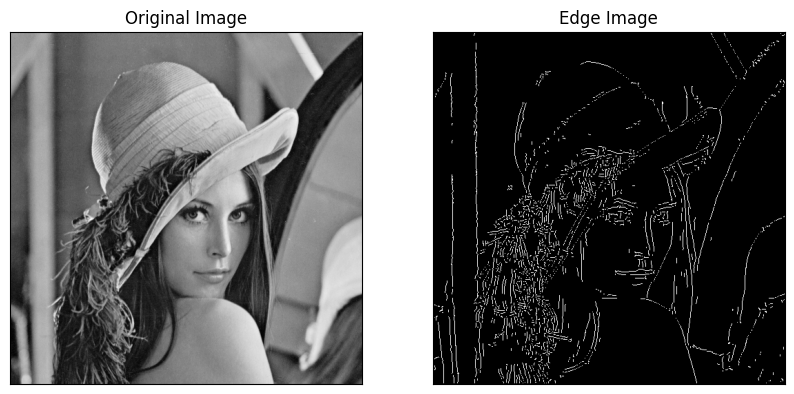

In [114]:
image_path = '/content/drive/MyDrive/image_processing_lab/leena_img.png'

canny_edge_detection(image_path)

## Using function

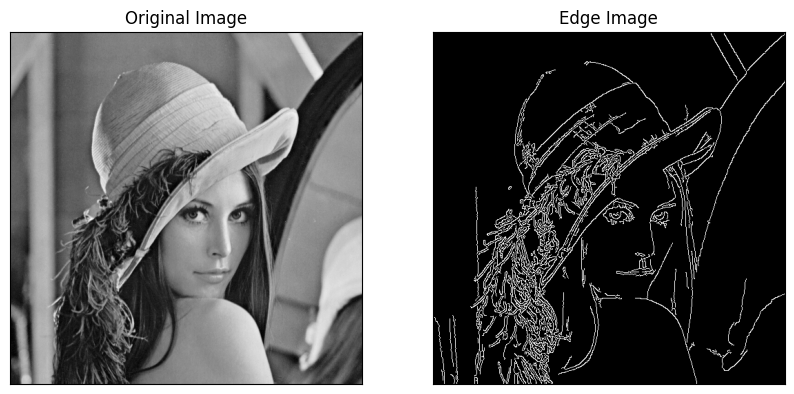

In [116]:
img = cv.imread('/content/drive/MyDrive/image_processing_lab/leena_img.png', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img,50,200)

plt.figure(figsize=(10, 10))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()